In [4]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Web Scraping Reddit for data
For preparing the public sentiment information dataset we use Reddit, a top social networking platform with comments and posts about Stock market

In [7]:
import praw

reddit = praw.Reddit(client_id='xhfgkheRdhkDJmDcbskwSw',
                     client_secret='olUBHl-I3uB-rjGsnsqvW88Ri7HBlQ',
                     user_agent='skippyRohan')

In [32]:
#creating a set for our post titles
posts = set()

SubReddits are categories within the site where all posts regarding a particular topic (category) are compiled, so we'll use the 'StockMarket' subreddit, where all posts related to stock market are posted

In [33]:
# Printing out the number of Headlines we can get in a particular subreddit

for red in reddit.subreddit('StockMarket').new(limit=None):
    posts.add(red.title)
    display.clear_output()
    print(len(headlines))

932


These are the titles of the posts -

In [155]:
i = 1
for line in posts:
    print(i, " ", line)
    i=i+1

1   WPP’s Wavemaker with Acceleration adds in-housing consultancy and digital transformation to Perrigo media brief
2   NXTP💰🚀nextplaytechnologies
3   The National Dental Association and SmileDirectClub Launch Scholarship
4   PHUN just the cool off before the real blast off🚀
5   #premarket #watchlist 10/29 $GFAI - Guardforce AI Announces Strategic Partnerships , $CADE - BancorpSouth Bank and Cadence Bancorporation Complete Their Merger, $BEST - BEST to offloads its express business in China to J&T Express... Any trading ideas? Welcome in comments! Also check my app!
6   I scraped r/stockmarket for the top ticker mentions in the last 24H. Here are the results (Thursday November 04, 2021)
7   Stockstack 0.5.0 - Financial data aggregation made easy | Product Hunt
8   How to find "rabbit" or identify potential MEME-stocks.
9   October jobs report: Payrolls grew by 531,000 as unemployment rate fell to 4.6%
10   $BTCM Crypto Mining, Bitcoin at all time high
11   Got into stocks 1 year ago, s

914   Tomorrow are financials released and earnings calls this baby should go above 10€ this week!
915   Bout to bust
916   Inflation vs. Stock Market Returns. There’s no clear pattern here. That could be because the stock market is supposed to be forward-looking and inflation involves backward-looking data but even if you did some sort of look-ahead there’s nothing there.
917   Nice!
918   Best Way to Get Comfortable Investing?
919   #premarket #watchlist 10/19 $WATT - Energous Granted FCC Approval for Unlimited Distance Over-the-Air , $IFRX - InflaRx Awarded up to EUR 43.7 Million (~USD 50.7 Million) Grant by German Government , $TBLT - no news... Any trading ideas? Welcome in comments! Also check my app.
920   Portfolio opinions - Diversify or build on what I have?
921   Anti-inflation hedge???!📈 (EQX Stock Analysis)
922   Is the Joker a market maker?
923   Here is a Market Recap for today Wednesday, October 20, 2021
924   $EH - Indonesia news today: EHang Flying Taxi to Arrive in N

The easiest method to prepare the Dataset labels is the SentimentIntensityAnalyzer tool for now. Though its not very effective, it acts like a decision stump, but with sufficient data, it can be used as a classifier, giving lablels -

$\textbf{0}$ for $\textbf{Neutral Sentiment}$

$\textbf{1}$ for $\textbf{Positive Sentiment}$

$\textbf{-1}$ for $\textbf{Negative Sentiment}$

In [34]:
sia = SentimentIntensityAnalyzer()
results = []

for line in posts:
    pol_score = sia.polarity_scores(line)
    pol_score['post'] = line
    results.append(pol_score)

df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,post
0,0.0,1.000,0.000,0.0000,WPP’s Wavemaker with Acceleration adds in-hous...
1,0.0,1.000,0.000,0.0000,NXTP💰🚀nextplaytechnologies
2,0.0,1.000,0.000,0.0000,The National Dental Association and SmileDirec...
3,0.0,0.796,0.204,0.3182,PHUN just the cool off before the real blast off🚀
4,0.0,0.817,0.183,0.8597,#premarket #watchlist 10/29 $GFAI - Guardforce...


In [35]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,post,label
0,0.0,1.000,0.000,0.0000,WPP’s Wavemaker with Acceleration adds in-hous...,0
1,0.0,1.000,0.000,0.0000,NXTP💰🚀nextplaytechnologies,0
2,0.0,1.000,0.000,0.0000,The National Dental Association and SmileDirec...,0
3,0.0,0.796,0.204,0.3182,PHUN just the cool off before the real blast off🚀,1
4,0.0,0.817,0.183,0.8597,#premarket #watchlist 10/29 $GFAI - Guardforce...,1


In [38]:
df2 = df[['post', 'label']]
df2.to_csv('reddit_posts_labels.csv', mode='a', encoding='utf-8', index=False)

In [80]:
print("Positive Posts:\n")
pprint(list(df[df['label'] == 1].post)[:5], width=200)

print("\nNegative Posts:\n")
pprint(list(df[df['label'] == -1].post)[:5], width=200)

Positive Posts:

['PHUN just the cool off before the real blast off🚀',
 '#premarket #watchlist 10/29 $GFAI - Guardforce AI Announces Strategic Partnerships , $CADE - BancorpSouth Bank and Cadence Bancorporation Complete Their Merger, $BEST - BEST to offloads its '
 'express business in China to J&T Express... Any trading ideas? Welcome in comments! Also check my app!',
 'I scraped r/stockmarket for the top ticker mentions in the last 24H. Here are the results (Thursday November 04, 2021)',
 'Stockstack 0.5.0 - Financial data aggregation made easy | Product Hunt',
 'Hmm, really 10x? Thanks for the tip!']

Negative Posts:

['October jobs report: Payrolls grew by 531,000 as unemployment rate fell to 4.6%',
 'Tapering Begins, Fed Insist Low Rates Will Persist.',
 "This week's hot stocks, high IV list, top & worst performers of the week.",
 'What do I do with my losing positions? I have a really hard time closing losses.',
 'Women May Be Better Investors Than Men. Let Me Mansplain Why. Over

In [39]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    533
 1    295
-1    104
Name: label, dtype: int64
 0    57.188841
 1    31.652361
-1    11.158798
Name: label, dtype: float64


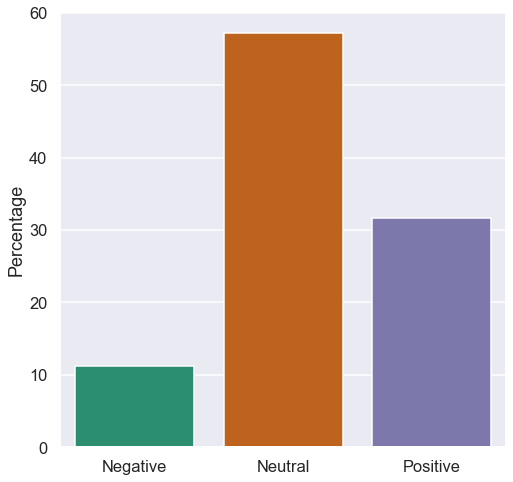

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style='darkgrid', context='talk', palette='Dark2')
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

### Data Cleaning
- Reading the list of posts
- perform lowercasing, 
- tokenizing, 
- stopword removal

### We use our own formed stemming module

In [156]:
import Stemmedd as ct

x_pos = list(df[df['label'] == 1].post)
x_neg = list(df[df['label'] == -1].post)             
y = list(df[df['label'] == 1].label)
z = list(df[df['label'] == -1].label)
y = y+z

print(len(x_pos))
print(len(x_neg))
print(len(y))

295
104
399


Data Imbalance will be later taken care of

In [157]:
x_pos_clean = [ct.getStemmedReview(i) for i in x_pos]

In [158]:
x_pos_clean

['phun cool real blast',
 'premarket watchlist 10 29 gfai guardforc ai announc strateg partnership cade bancorpsouth bank cadenc bancorpor complet merger best best offload express busi china j express trade idea welcom comment also check app',
 'scrape r stockmarket top ticker mention last 24h result thursday novemb 04 2021',
 'stockstack 0 5 0 financi data aggreg made easi product hunt',
 'hmm realli 10x thank tip',
 'growth portfolio thought',
 'simpl dollar cost averag still king invest strategi analyz last 3 decad stock market data find best dca strategi',
 'biggest singl day growth one kind stock 3 month invest career wärtsilä well today',
 'survivorship bia u stock market perform american corpor domin rest world last decad unit state extraordinari run stock market mani decad home biggest best compani world',
 'aa alcoa corp growth 15 today',
 'look like one new compani enter smart phone mobil commun market new product shake establish compani alreadi marketplac',
 'option valu var

In [161]:
pos_tokens = process_text(x_pos_clean)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common()

[('market', 113),
 ('stock', 113),
 ('10', 93),
 ('2021', 87),
 ('news', 59),
 ('stocks', 52),
 ('trading', 49),
 ('today', 46),
 ('october', 42),
 ('earnings', 41),
 ('sp500', 40),
 ('winners', 38),
 ('buy', 36),
 ('investing', 33),
 ('shares', 33),
 ('week', 32),
 ('new', 31),
 ('year', 30),
 ('2', 30),
 ('1', 27),
 ('11', 27),
 ('portfolio', 25),
 ('like', 25),
 ('years', 24),
 ('daily', 24),
 ('price', 24),
 ('brief', 23),
 ('time', 23),
 ('pre', 22),
 ('day', 22),
 ('money', 22),
 ('good', 22),
 ('tesla', 22),
 ('last', 21),
 ('3', 21),
 ('short', 21),
 ('investments', 21),
 ('going', 21),
 ('comments', 20),
 ('friday', 20),
 ('options', 20),
 ('etfs', 20),
 ('next', 20),
 ('results', 19),
 ('monday', 19),
 ('losers', 19),
 ('million', 19),
 ('premarket', 18),
 ('ideas', 18),
 ('thoughts', 18),
 ('movers', 18),
 ('think', 18),
 ('watchlist', 17),
 ('4', 17),
 ('company', 17),
 ('facebook', 17),
 ('go', 17),
 ('20', 17),
 ('looking', 17),
 ('big', 17),
 ('welcome', 16),
 ('5', 16),

In [151]:
x_neg_clean = [ct.getStemmedReview(i) for i in x_neg]

In [125]:
x_neg_clean

['octob job report payrol grew 531 000 unemploy rate fell 4 6',
 'taper begin fed insist low rate persist',
 'week hot stock high iv list top worst perform week',
 'lose posit realli hard time close loss',
 'women may better investor men let mansplain overconfid bad women less like fall victim paywal',
 'may gambl problem',
 'bull run sinc 2009 covid crash mere blip timelin compar crash',
 'mark read prove wpp doubter wrong battl publici biggest agenc group',
 'tsla earn predict beat estim go enough',
 'final broke 50k rh primarili use vanguard stop put rh last year',
 'insan',
 'best inc recent sell make sens consid bullish express unit deal think buy dip moment',
 'paul tudor jone say inflat could wors fear biggest threat market societi',
 'stock averag horrifi loss rn',
 'cathi wood next big risk deflat',
 'year recov bad earli decis final broke even today',
 'premarket watchlist 11 01 abvc 3 file offer share bttx news artl news zsan news trade idea welcom comment also check app',
 

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
cv = CountVectorizer()
x_pos_vec = cv.fit_transform(x_pos_clean).toarray()
print(x_pos_vec)
print(x_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(932, 2572)


In [78]:
print(cv.get_feature_names())

['00', '000', '002', '0091224', '01', '02', '03', '04', '05', '096', '10', '100', '1000', '100k', '101', '10x', '11', '110', '1170', '11th', '12', '121', '12th', '13', '131', '135', '13th', '14', '14th', '15', '150', '15cagr', '15th', '16', '17', '17th', '18', '18k', '18th', '19', '190', '1929', '193', '195', '1987', '19th', '1k', '1m', '1st', '1x', '1y', '20', '200', '2000', '2009', '2016', '2017', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2028', '20mm', '20th', '20yr', '21', '2100', '21st', '22', '220', '220b', '224000', '22nd', '23', '237', '24', '245', '24h', '24th', '25', '250', '25th', '26', '26th', '27', '27k', '27th', '28', '28th', '29', '29th', '2k', '2nd', '2x', '30', '300', '3000', '300k', '305', '306', '30k', '32k', '332x', '34', '35', '3month', '40', '400', '401', '401k', '41', '42', '43', '45', '465', '47', '470', '470mrd', '48', '487', '49', '4k', '4th', '50', '500', '5000', '500m', '50c', '50k', '51', '52', '531', '54', '55', '57', '57m', '5800', '5d', '5

In [79]:
xt_vec = cv.transform(xt_clean).toarray() #tranform test data according to features learnt on training data
print(xt_vec)
cv.get_feature_names()
print(xt_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(280, 2572)
